In [1]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
import os

data_path = "/home/anik/Downloads"
# os.rmdir(outdir)

# Re-Produce: arXiv:1910.09283v4

In [2]:
label = "model_fitting"
outdir = "outdir"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

In [3]:
data = np.transpose(np.loadtxt(data_path+'/HZ_test_1.txt'))

H = data[1]
z = data[0]
sigma = 1.0
a0  = 1.0
print(len(z))

25


00:03 bilby INFO    : Running for label 'model_fitting', output will be saved to 'outdir'
00:03 bilby INFO    : Analysis priors:
00:03 bilby INFO    : beta=Uniform(minimum=0.1, maximum=2, name=None, latex_label='$\\beta$', unit=None, boundary=None)
00:03 bilby INFO    : alpha=Uniform(minimum=0.1, maximum=100, name=None, latex_label='$\\alpha$', unit=None, boundary=None)
00:03 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
00:03 bilby INFO    : Analysis likelihood noise evidence: nan
00:03 bilby INFO    : Single likelihood evaluation took 1.312e-04 s
00:03 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 1000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'gradient': None,

1it [00:00, ?it/s]

00:04 bilby INFO    : Written checkpoint file outdir/model_fitting_resume.pickle
/home/anik/anaconda3/envs/imrct/lib/python3.9/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
00:04 bilby INFO    : Rejection sampling nested samples to obtain 2692 posterior samples
00:04 bilby INFO    : Sampling time: 0:00:53.294388


<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
00:04 bilby INFO    : Summary of results:
nsamples: 2692
ln_noise_evidence:    nan
ln_evidence: -1911.891 +/-  0.129
ln_bayes_factor:    nan +/-  0.129



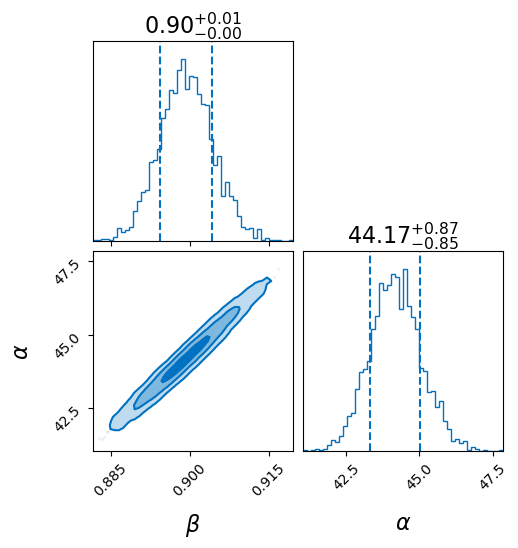

In [4]:
def model_re(z, beta, alpha):
    eta = beta
    H = eta * (a0 / alpha)**(-1/eta) * (1 + z)**(1/eta)
    return H

likelihood = bilby.likelihood.GaussianLikelihood(z, H, model_re, sigma =1.0)

priors = dict()
priors["beta"] = bilby.core.prior.Uniform(0.1, 2, latex_label="$\\beta$")
priors["alpha"] = bilby.core.prior.Uniform(0.1, 100, latex_label="$\\alpha$")

result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    nlive = 1000,
    # walks = 20,
    # nact = 50,
    # maxmcmc = 2000,
    # npool = 4,
    outdir=outdir,
    label=label,
)


# result = bilby.run_sampler(
#     likelihood=likelihood,
#     priors=priors,
#     sampler="bilby-mcmc", # "Dynesty"
#     nsamples = 1000,
#     outdir=outdir,
#     label=label,
# )

result.plot_corner()

In [5]:
result.posterior

,beta,alpha,log_likelihood,log_prior
0,0.881681,41.033405,-1910.573341,-5.246024
1,0.915396,46.815283,-1908.901251,-5.246024
2,0.916078,46.953627,-1908.823268,-5.246024
3,0.919591,47.849660,-1908.178734,-5.246024
4,0.912829,46.341701,-1907.881770,-5.246024
...,...,...,...,...
2687,0.898968,44.115852,-1900.573180,-5.246024
2688,0.898939,44.106190,-1900.572992,-5.246024
2689,0.899421,44.193431,-1900.572912,-5.246024
2690,0.899114,44.136307,-1900.571946,-5.246024


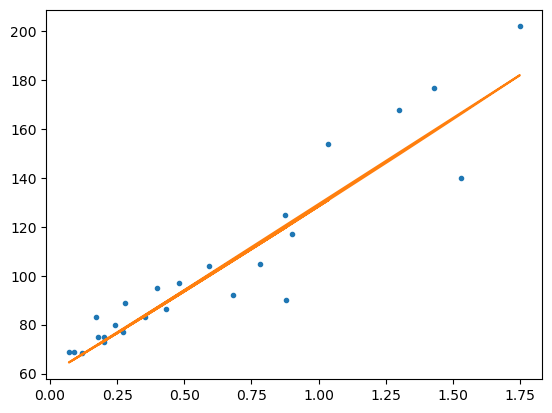

In [6]:
plt.plot(z, H, '.')
plt.plot(z, model_re(z, 45.16, 0.91))

In [7]:
def H0(alpha, eta):
    ho = eta*(a0/alpha)**(-1/eta)
    return ho
result.posterior['H0'] = H0(result.posterior['alpha'], result.posterior['beta'] )
print(H0(67.2, 1.003))
result.posterior

66.55864858248908


,alpha,beta,log_likelihood,log_prior,H0
0,44.119861,0.897323,-1908.717365,-5.246024,61.062004
1,42.540772,0.891227,-1908.511814,-5.246024,59.922134
2,42.436573,0.890509,-1907.968227,-5.246024,59.912116
3,47.132113,0.915048,-1907.378496,-5.246024,61.674973
4,46.406341,0.913077,-1907.317172,-5.246024,61.057515
...,...,...,...,...,...
2772,44.216409,0.899557,-1900.574246,-5.246024,60.723287
2773,44.213602,0.899547,-1900.573849,-5.246024,60.721087
2774,44.103900,0.898912,-1900.572967,-5.246024,60.691063
2775,44.186447,0.899382,-1900.572555,-5.246024,60.715523


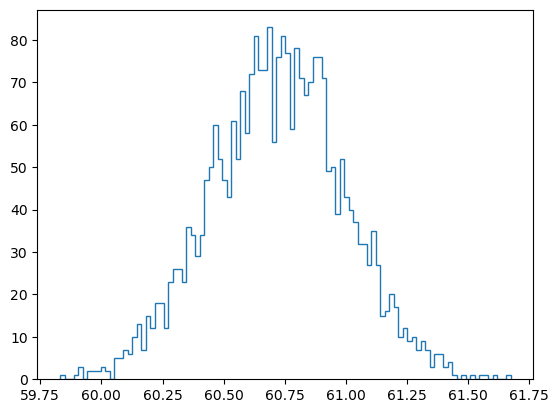

In [8]:
plt.hist(result.posterior['H0'], bins=100, histtype='step')

plt.show()

# New observation and calculation

In [4]:
def model(z, alpha, beta, gamma):
    eta = beta + gamma
    H = eta * (a0 / alpha)**(-1/eta) * (1 + z)**(1/eta)
    return H

In [5]:
data = np.transpose(np.loadtxt(data_path+'/Hzdata.txt'))

z = data[1]
H = data[0]
sigma = 1.0
a0  = 1.0

In [5]:
# Define Likelihood>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

likelihood = bilby.likelihood.GaussianLikelihood(z, H, model, sigma =1.0)

In [6]:
# Define Prior>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

priors = dict()
priors["alpha"] = bilby.core.prior.Uniform(0.1, 100, latex_label="$\\alpha$")
priors["beta"] = bilby.core.prior.Uniform(0.01, 2, latex_label="$\\beta$")
priors["gamma"] = bilby.core.prior.Uniform(0.01, 2, latex_label="$\\gamma$")

In [7]:

# Run Sampler>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    nlive = 500,
    # walks = 20,
    # nact = 50,
    # maxmcmc = 2000,
    # npool = 4,
    outdir=outdir,
    label=label,
)

# result = bilby.run_sampler(
#     likelihood=likelihood,
#     priors=priors,
#     sampler="bilby-mcmc", # "Dynesty"
#     nsamples = 1000,
#     outdir=outdir,
#     label=label,
# )

13:41 bilby INFO    : Running for label 'model_fitting', output will be saved to 'outdir'
13:42 bilby INFO    : Analysis priors:
13:42 bilby INFO    : alpha=Uniform(minimum=0.1, maximum=100, name=None, latex_label='$\\alpha$', unit=None, boundary=None)
13:42 bilby INFO    : beta=Uniform(minimum=0.01, maximum=2, name=None, latex_label='$\\beta$', unit=None, boundary=None)
13:42 bilby INFO    : gamma=Uniform(minimum=0.01, maximum=2, name=None, latex_label='$\\gamma$', unit=None, boundary=None)
13:42 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
13:42 bilby INFO    : Analysis likelihood noise evidence: nan
13:42 bilby INFO    : Single likelihood evaluation took 8.710e-05 s
13:42 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 500, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None,

1it [00:00, ?it/s]

13:42 bilby INFO    : Written checkpoint file outdir/model_fitting_resume.pickle
/home/anik/anaconda3/envs/imrct/lib/python3.9/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
13:42 bilby INFO    : Rejection sampling nested samples to obtain 1384 posterior samples
13:42 bilby INFO    : Sampling time: 0:00:31.265287


<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
13:42 bilby INFO    : Summary of results:
nsamples: 1384
ln_noise_evidence:    nan
ln_evidence: -2157.329 +/-  0.184
ln_bayes_factor:    nan +/-  0.184



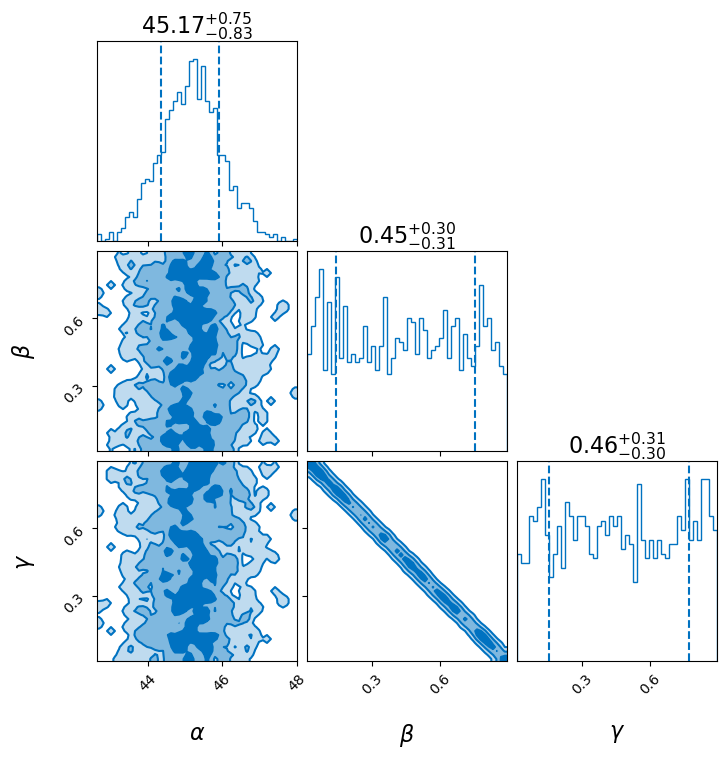

In [8]:
result.plot_corner()

In [9]:
result.posterior

,alpha,beta,gamma,log_likelihood,log_prior
0,48.012935,0.271733,0.651030,-2155.207130,-5.980439
1,46.708923,0.629112,0.288889,-2151.000651,-5.980439
2,46.112772,0.665925,0.248935,-2150.767341,-5.980439
3,42.664125,0.218843,0.675739,-2150.726813,-5.980439
4,44.514300,0.152601,0.753403,-2150.680513,-5.980439
...,...,...,...,...,...
1379,45.040771,0.268717,0.639020,-2145.359083,-5.980439
1380,45.054861,0.229555,0.678309,-2145.356833,-5.980439
1381,45.184110,0.320282,0.588280,-2145.355264,-5.980439
1382,45.147017,0.145952,0.762429,-2145.354929,-5.980439
